# New York Subway and Weather Data 

Working with 2D data with numpy and pandas.

### Questions 

* What variables area related to subway ridership? 
    * What stations have the most riders?
    * What are the ridership patterns over time? On weekends Holidays? 
    * How does the weather affect ridership?
* What patterns can I find in the weather?
    * How does the weather vary across the city? 
    * How does the temperature rise throughout the month?


In [1]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Storing 2D Data 

* Pure python: Lists of lists 
* NumPy: 2D array (more memory efficent, accessing elements differ in syntax) 
* Pandas : Dataframe 

### Storing 2D Data : NumPy 


In [2]:
# Sample Numpy 2D array: Subway ridership for 5 stations and 10 days
# Columns represent train stations, and rows represent days

ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

# Check type of 2D array
ridership.dtype

dtype('int64')

Working with Numpy 2D arrays: 

* Station with max number of riders on day 1 and the mean riders per day (mean_for_max)
* For all days and stations what is the mean ridership overall? (overall_mean)

In [3]:
def mean_riders_for_max_station(ridership):
    # Max riders on day 1
    max_station = ridership[0,:].argmax()            # argmax returns position
    # Mean riders per day for max_station
    mean_for_max = ridership[:, max_station].mean()
    overall_mean = ridership.mean()
    return (overall_mean, mean_for_max)

mean_riders_for_max_station(ridership)

(2342.5999999999999, 3239.9000000000001)

Station with higher ridership on day1 had a higher ridership than average. This is interesting but not useful.

###### Use NumPy's axis function to find more practical results:
* Mean ridership per day for each subway station
* Maximum and minimum ridership for each day for each subway station

In [4]:
def min_and_max_riders_per_day(ridership):
    # Mean per day for each station 
    station_riders = ridership.mean(axis = 0)      #selects columns 
    
    max_daily_ridership = station_riders.max()
    min_daily_ridership = station_riders.min() 
    
    return (max_daily_ridership, min_daily_ridership)

min_and_max_riders_per_day(ridership)

(3239.9000000000001, 1071.2)

The station with the max daily ridership had 3239 riders.
The station with the min daily ridership had 1071 riders.

### Storing 2D Data : Pandas Dataframes

Recreate the sample 2D numpy array using a pandas dataframe. Advantages of a pandas dataframe over a 2D NumPy array includes the following:
* Indexs for rows 
* Name for columns 
* Different data types for each column 

In [5]:
# Create a pandas df

ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

# Print df
ridership_df

,R003,R004,R005,R006,R007
05-01-11,0,0,2,5,0
05-02-11,1478,3877,3674,2328,2539
05-03-11,1613,4088,3991,6461,2691
05-04-11,1560,3392,3826,4787,2613
05-05-11,1608,4802,3932,4477,2705
05-06-11,1576,3933,3909,4979,2685
05-07-11,95,229,255,496,201
05-08-11,2,0,1,27,0
05-09-11,1438,3785,3589,4174,2215
05-10-11,1342,4043,4009,4665,3033


Mean ridership for each station (column).

In [6]:
# Mean of each column 
ridership_df.mean()

R003    1071.2
R004    2814.9
R005    2718.8
R006    3239.9
R007    1868.2
dtype: float64

Mean ridership for each day (row).

In [7]:
# Mean of each row 
ridership_df.mean(axis = 1)

05-01-11       1.4
05-02-11    2779.2
05-03-11    3768.8
05-04-11    3235.6
05-05-11    3504.8
05-06-11    3416.4
05-07-11     255.2
05-08-11       6.0
05-09-11    3040.2
05-10-11    3418.4
dtype: float64

Accessing a station (column) of the dataframe using "iloc"

In [8]:
#ridership_df.iloc['R007'] --> This is wrong
print ridership_df.iloc[4]

print ridership_df['R007'] # prints beginning of column

R003    1608
R004    4802
R005    3932
R006    4477
R007    2705
Name: 05-05-11, dtype: int64
05-01-11       0
05-02-11    2539
05-03-11    2691
05-04-11    2613
05-05-11    2705
05-06-11    2685
05-07-11     201
05-08-11       0
05-09-11    2215
05-10-11    3033
Name: R007, dtype: int64


Accessing a day (row/index) of the dataframe using "loc"

In [9]:
ridership_df.loc['05-09-11']

R003    1438
R004    3785
R005    3589
R006    4174
R007    2215
Name: 05-09-11, dtype: int64

Accessing a day/station (row/column) of the dataframe using "iloc" or "loc"

In [10]:
# Two methods
print ridership_df.iloc[0,3]
print ridership_df.loc['05-01-11', 'R006']

5
5


Get a 2D Numpy array from a Pandas Dataframe:

This will output a 2D array with no rows or columns. Useful for taking the mean of all the values. Make sure data types are consistent.

In [11]:
print ridership_df.values
print ridership_df.values.mean()

[[   0    0    2    5    0]
 [1478 3877 3674 2328 2539]
 [1613 4088 3991 6461 2691]
 [1560 3392 3826 4787 2613]
 [1608 4802 3932 4477 2705]
 [1576 3933 3909 4979 2685]
 [  95  229  255  496  201]
 [   2    0    1   27    0]
 [1438 3785 3589 4174 2215]
 [1342 4043 4009 4665 3033]]
2342.6


In [12]:
# Maxmimum number of riders on the first day 
ridership_df.iloc[0].argmax()

'R006'

We rewrite the mean_riders_for_max_station function, but this time the input is a Pandas DataFrame rather than a 2D NumPy array. The main differences:
* iloc[0] instead of [0,:] to access a row
* [max_station] instead of [:, max_station] to access a column
* .values.mean() instead of .mean() to get the overall mean instead of a series of means

In [13]:
def mean_riders_for_max_station(ridership):
    # Max riders on day 1 station
    max_station = ridership.iloc[0].argmax()     
    # Mean riders per day for max station
    mean_for_max = ridership[max_station].mean()
    overall_mean = ridership.values.mean()
    return (overall_mean, mean_for_max)

mean_riders_for_max_station(ridership_df)

(2342.5999999999999, 3239.9000000000001)

Same result regardless of whether we used numpy arrays or pandas dataframe. 

Loading Data into a Dataframe


In [14]:
# Read in file
subway_df = pd.read_csv('nyc_subway_weather.csv')

Instead of printing all the rows of the data, print the first 4 rows only using .head().

In [15]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


Number of rows in our dataframe:

In [16]:
len(subway_df)

42649

Use the describe() function to see some statistics about each column.

In [17]:
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


Linear correlation between two variables using pearson's r

* Standardize each variable by converting it to a number of standard deviations above or below the mean. This will help scale the data. The further a data point is from the x,y axis, the larger the contribution to the pearson's r value.
* Multiply each pair of values and take the average of the products. This will split the data into four quadrants where the data is either both above/below.
* Value should be from -1 to +1

Note: Numpy has a corrcoef() function as awell.

In [18]:
# Function to compute linear correlation between 2 variables
def correlation(x, y):       # input can be a numpy 2d array or panda series 
    # Standardize data
    std_x = (x - x.mean()) / x.std(ddof=0)           #"ddof=0" for panda's uncorrected std function 
    std_y = (y - y.mean()) / y.std(ddof=0)
    return (std_x * std_y).mean()

In [19]:
# Get columns of data
entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

How to interpret pearson's r results:

* Postive "r" value. As one value increases, the other value increases:
    * Both values above the mean, product is positive from (+,+)
    * Both values below the mean, product is positive from (-,-)

* Negative "r" value. As one value increases, the other value decreases:
    * One value above the mean, other value below the mean, product is negative from (-, +) 
    * One value above the mean, other value below the mean, product is negative from (+, -) 
    
* If value is near 0, then poor correlation between two variables


Applying pearson's r to subway data:

In [20]:
correlation(entries, rain)

0.035648515772244052

Subway entries and rain 
* small positive correlation
* more rain correlated with more subway entries


In [21]:
correlation(entries, temp)

-0.026693348321570803

Subway entries and temperature 
* small negative correlation
* higher temperature correlated with lower subway entries
* lower temperature correlated with higher subway entries

In [22]:
correlation(rain, temp)

-0.22903432340843488

Rain and temperature 
* medium negative correlation 
* higher rain correlated with lower temperature 
* lower rain correlated with higher temperature

In [23]:
correlation(entries, cum_entries)

0.58589547076620752

Subway daily entries and cummulative subway entries 
* high positive correlation 
* high cummulative subway entries correlated with high daily entries

Pandas Means and Axis Names 
* For axis = 0 or axis = 'index', the mean of each column is taken
* For axis = 1 or axis = 'columns', the mean of each row is taken


Pandas and Vectorized Operations 
* Match up elements by index and columns instead of position ( as in numpy 2d arrays)



#### Convert Total Entries and Exits to Hourly Entries and Exits

The subway data included the cummulative number of entries and exits by riders. We do not want the cummulative data, instead we want the hourly number of entries and exits. This can be done using two methods.

In [24]:
# Sample data: DF with total entries (column1) and total exits (column2)
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

In [25]:
# Method 1 : Write a function 

# Use shift(1) which shifts index by period of 1
def get_hourly_entries_and_exits(entries_and_exits):
    # Subtract value from each previous row 
    return entries_and_exits - entries_and_exits.shift(1)
get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


In [26]:
# Method 2: Builtin .diff() function
print entries_and_exits.diff() 

   ENTRIESn  EXITSn
0       NaN     NaN
1      23.0     8.0
2      18.0    18.0
3      71.0    54.0
4     170.0    44.0
5     214.0    42.0
6      87.0    11.0
7      10.0     3.0
8      36.0    89.0
9     153.0   333.0


Pandas and non built-in functions 
* write a helper function
* applymap() function maps a function element to element

For dataframes the applymap() and apply() functions do different things. 
* apply(): applies helper on each column/series. 
    * Can get max value from each column using df.apply(np.max) 
* applymap(): applies helper to each element 

Example: Get the second largest value in each column 

In [27]:
# Helper for single column
def second_largest_in_column(column):
    # Sort column in descending order. Find second value.
    sorted_column = column.sort_values(ascending=False)
    return sorted_column.iloc(1) # Second value at position 1

# Apply function to a df 
def second_largest(df):
    return df.apply(second_largest_in_column)

# second_largest(df)

Pandas addition of dataframes and series 

* dataframe + dataframe = dataframe 
* series + series = series 
* dataframe + series = ???


In [28]:
# Series + Square dataFrame 0,1,2,3 column/index names 
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

# Each value of the series was added to each column of the dataframe
print df + s

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [29]:
# Series + one-row DataFrame 
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})

# Each value of the series was added to each column of the dataframe
# Same as above 
print df + s

    0   1   2   3
0  11  22  33  44


In [30]:
# Series + one-column DataFrame
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10, 20, 30, 40]}) # one column

# First column had 1 added, the rest were NaNs
print df + s

# df.add(s, axis = 'columns') 
df.add(s, axis = 'rows') # Each value of series added to one row 

    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN


,0
0,11
1,22
2,33
3,44


In [31]:
# DataFrame column with name + Series index with name ( matching names)

s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})
print df + s

    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [32]:
# DataFrame column with name + Series index with name ( non- matching names)
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})

# No match between indexes --> NaN
print df + s

    0   1   2   3   a   b   c   d
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


Standardizing rows/columns using vector operations without apply() 


In [33]:
# Example dataset using grades and names of students 
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [34]:
grades_df.mean()

exam1    77.7
exam2    57.4
dtype: float64

In [35]:
# Subtract mean1 from column1 and mean2 from column2
# Divide each column by it's standard deviation 

(grades_df - grades_df.mean() )/ grades_df.std()

,exam1,exam2
Andre,-2.196525,-2.186335
Barry,0.208891,0.366571
Chris,0.018990,-0.091643
Dan,-0.170911,-0.091643
Emilio,0.715295,0.628408
Fred,-0.487413,-0.418938
Greta,0.841896,1.413917
Humbert,-0.803916,-0.746234
Ivan,1.284999,0.955703
James,0.588694,0.170194


In [36]:
# Standardize by rows, set axis = columns to get mean of each row 
# Subtract means from rows using sub() and axis = 'index'
mean_diffs = grades_df.sub(grades_df.mean(axis='columns'), axis='index')

# Divide by standard deviation - same values since only 2 columns 
mean_diffs.div(grades_df.std(axis='columns'), axis ='index')

,exam1,exam2
Andre,0.707107,-0.707107
Barry,0.707107,-0.707107
Chris,0.707107,-0.707107
Dan,0.707107,-0.707107
Emilio,0.707107,-0.707107
Fred,0.707107,-0.707107
Greta,0.707107,-0.707107
Humbert,0.707107,-0.707107
Ivan,0.707107,-0.707107
James,0.707107,-0.707107


Pandas Groupby() function 

General idea: Group data then aggregate data by taking an average within the group. Pandas has the following built-in functions:
* group_data()
* sum_grouped_items()


In [37]:
# Example dataframe
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

example_df

,above_three,even,value
a,False,False,1
b,False,False,3
c,False,True,2
d,True,True,4
e,False,False,1
f,True,True,6
g,True,True,4


In [38]:
# Groups
grouped_data = example_df.groupby('even')
# The groups attribute is a dictionary mapping keys to lists of row indexes
print grouped_data.groups

{False: Index([u'a', u'b', u'e'], dtype='object'), True: Index([u'c', u'd', u'f', u'g'], dtype='object')}


In [39]:
# Group by multiple columns
grouped_data = example_df.groupby(['even', 'above_three'])
print grouped_data.groups

{(True, False): Index([u'c'], dtype='object'), (False, False): Index([u'a', u'b', u'e'], dtype='object'), (True, True): Index([u'd', u'f', u'g'], dtype='object')}


In [40]:
# Get sum of each group
grouped_data = example_df.groupby('even')
print grouped_data.sum()

       above_three  value
even                     
False          0.0      5
True           3.0     16


In [41]:
# Limit columns in result
grouped_data = example_df.groupby('even')
print grouped_data.sum()['value']

even
False     5
True     16
Name: value, dtype: int64


In [42]:
# Subset of columns from the grouped data before collapsing to a dataframe
# Same results
print grouped_data['value'].sum()

even
False     5
True     16
Name: value, dtype: int64


Pandas groupby() function applied to NYC subway data 

Question1: How does ridership vary by hour of the day?
* For each hour of the day, group the data 
* For each hour of the day, find average ridership 

Question2 : How does rain affect subway ridership?
* Break data into two groups 1) raining 2) non-raining 
* Compare ridership between two groups

Question3: How does ridership vary by day of week?
* For each day of the week, group the data
* For each day of the week, find average ridership 

Question3 Solution: How does ridership vary by day of week?



In [43]:
# Check headers first
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


The hourly data of the dataframe is taken in four hour intervals. 

In [44]:
# Question 1
ridership_by_hour = subway_df.groupby('hour').mean()['ENTRIESn_hourly']
print ridership_by_hour

hour
0     1403.248441
4      311.717653
8      879.029929
12    3010.949693
16    2306.527816
20    3226.240093
Name: ENTRIESn_hourly, dtype: float64


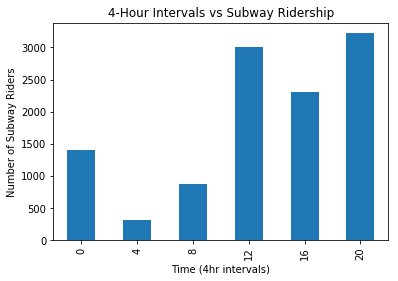

In [45]:
# Plot data in four hour intervals 
# ridership_by_hour.plot()
ridership_by_hour.plot.bar()
title('4-Hour Intervals vs Subway Ridership')
ylabel('Number of Subway Riders')
xlabel('Time (4hr intervals)')

Above is a plot of the ridership data vs four hour interval units. Highest ridership between the following intervals:
* 12pm - 4pm 
* 4pm - 8pm
* 8pm - 12am  

More useful to plot hourly entries and exits for each station (UNIT)

In [66]:
ex_ridership_df2 = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

In [67]:
# Hourly entries and exits for each station (UNIT)
def hourly_for_group(entries_and_exits):
    return entries_and_exits - entries_and_exits.shift(1)

ridership_by_station = ex_ridership_df2.groupby('UNIT')['ENTRIESn', 'EXITSn'].apply(hourly_for_group)
print ridership_by_station

   ENTRIESn  EXITSn
0       NaN     NaN
1       NaN     NaN
2      23.0     8.0
3      14.0     8.0
4      18.0    18.0
5      29.0   205.0
6      71.0    54.0
7     132.0   593.0
8     170.0    44.0


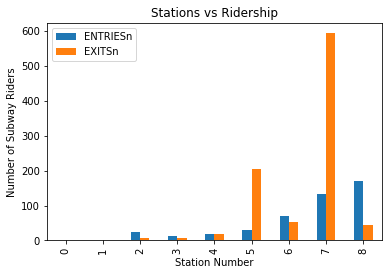

In [68]:
# By station:
# ridership_by_station.plot()
ridership_by_station.plot.bar()
title('Stations vs Ridership')
xlabel('Station Number')
ylabel('Number of Subway Riders')

Joining multiple Pandas Dataframes 

Note: this is unrelated to the NY subway dataset

* Pandas merge() function joins multiple tables 
* Types of joins: inner, left, right 


In [49]:
# This is unrelated to the NY subway dataset
ex_subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

ex_weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

In [50]:
# This is unrelated to the NY subway dataset
# JOIN two tables
ex_subway_df.merge(ex_weather_df, on =['DATEn', 'hour', 'latitude', 'longitude'], how = 'inner' )


,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


Visualizing Data 
* Data1: A scatterplot of subway stations with latitude and longitude as the x and y axes and ridership as the bubble size
* Data2: Histograms of subway ridership for days with rain and days without rain
* Data3: A scatterplot with subway ridership on one axis and precipitation or temperature on the other

In [51]:
# Data1 : Group data by longitude and latitude. Then find the mean
data_by_location = subway_df.groupby(['latitude', 'longitude']).mean()
data_by_location.head()

,,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
latitude,longitude,,,,,,,,,,,,,,,,,,,
40.576152,-73.975925,9.659049e+06,8.641132e+06,403.896175,325.956284,10.032787,2.907104,0.715847,0.010929,0.006284,29.972568,0.229508,63.383607,5.553005,0.006284,29.972568,63.383607,5.553005,40.603489,-73.958763
40.576298,-73.968523,8.306897e+06,6.646823e+06,526.697297,419.562162,9.989189,2.951351,0.708108,0.010811,0.006216,29.973297,0.227027,63.375135,5.517838,0.006216,29.973297,63.375135,5.517838,40.603489,-73.958763
40.577961,-73.961806,4.552910e+07,4.612408e+07,1950.295699,1930.483871,10.000000,2.935484,0.709677,0.010753,0.006183,29.973118,0.225806,63.394086,5.531720,0.006183,29.973118,63.394086,5.531720,40.603489,-73.958763
40.589547,-73.974295,7.268214e+06,7.961334e+06,485.382353,362.941176,10.164706,2.905882,0.705882,0.011765,0.006118,29.971176,0.200000,63.650588,5.630588,0.006118,29.971176,63.650588,5.630588,40.603489,-73.958763
40.590867,-73.797011,6.477945e+06,5.994957e+06,500.725610,374.628049,10.097561,2.951220,0.719512,0.024390,0.002744,29.981098,0.195122,61.721341,9.945122,0.002744,29.981098,61.721341,9.945122,40.660004,-73.844849


In [52]:
# Only want longitude and latitude (row indexes) --> as_index=False
data_by_location = subway_df.groupby(['latitude', 'longitude'], as_index=False).mean()
print data_by_location.head()['latitude']
print data_by_location.head()['longitude']

0    40.576152
1    40.576298
2    40.577961
3    40.589547
4    40.590867
Name: latitude, dtype: float64
0   -73.975925
1   -73.968523
2   -73.961806
3   -73.974295
4   -73.797011
Name: longitude, dtype: float64


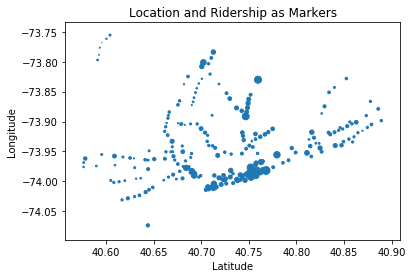

In [53]:
# Scatterplot with (x,y) as latitude,longitude and bubblesize = ridership
# Scale bubble markers by dividing by std
scaled_hourly_entries = (10 * data_by_location['ENTRIESn_hourly'] / data_by_location['ENTRIESn_hourly'].std() )
plt.scatter(data_by_location['latitude'], data_by_location['longitude'], s=scaled_hourly_entries )
title('Location and Ridership as Markers')
xlabel('Latitude')
ylabel('Longitude')

Can compare to a NYC subway map to get exact stations. High ridership in the following clusters.
* longitude from - 73.95 to -74.03  
* latitude from 40.70 to 40.79